### Lets see what the hidden layers outputs look like for a simple NN solving the XOR problem



In [17]:
#Imports 
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Lets make our mode:

In [18]:
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.hidden = nn.Linear(2, 2)
        self.output = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        h = self.sigmoid(self.hidden(x))
        o = self.sigmoid(self.output(h))
        return o, h #we also return the h so that we can then look at the hidden layer outputs

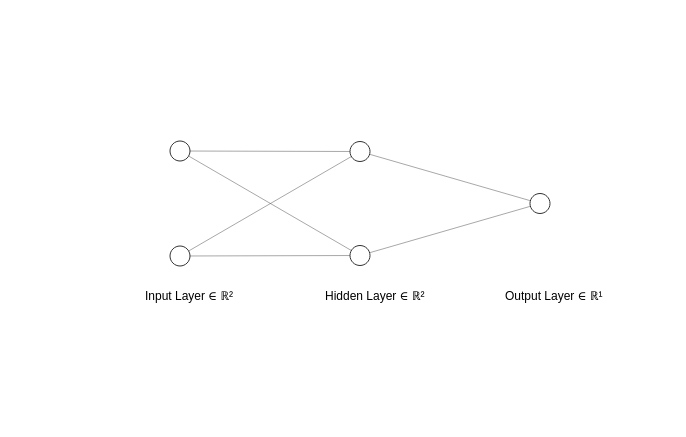

In [19]:
# initalize the network
model = XORNet()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

Lets make our data:

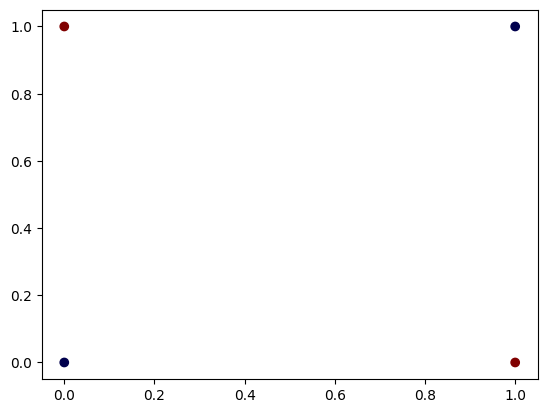

In [20]:
# Original points in XOR
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float)
plt.scatter(X[:,0],X[:,1], c=y, cmap='seismic') #plot the x and y of each point in X. Color coresponds with the y value(label): 0 or 1 (not to be confused with the x and y in the graph)


Now let's generate some more points around each of the 4 points

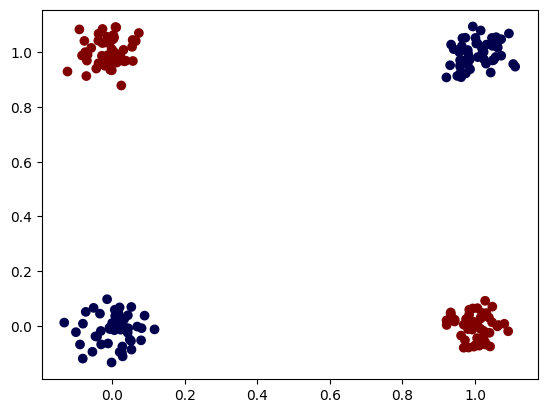

In [21]:
num_points_per_cluster = 50

# Noise to add around each point
noise_scale = 0.05

#Expand both lists to be: num_points_per_cluster * 4
X = X.repeat(num_points_per_cluster, 1)
y = y.repeat(num_points_per_cluster, 1)

# Now lets add the noise to each point
noise = torch.randn(X.shape) * noise_scale #creates an array of random noise values with the same size as the X matrix
X = X + noise #add the noise to each point


plt.scatter(X[:,0],X[:,1], c=y, cmap='seismic')

Now its time to Train!!

In [22]:
epochs = 50000
for epoch in range(epochs):
    optimizer.zero_grad()
    pred, _ = model(X)
    loss = criterion(pred, y)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 5000 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [5000/50000], Loss: 0.2497
Epoch [10000/50000], Loss: 0.2345
Epoch [15000/50000], Loss: 0.0322
Epoch [20000/50000], Loss: 0.0060
Epoch [25000/50000], Loss: 0.0030
Epoch [30000/50000], Loss: 0.0020
Epoch [35000/50000], Loss: 0.0015
Epoch [40000/50000], Loss: 0.0012
Epoch [45000/50000], Loss: 0.0010
Epoch [50000/50000], Loss: 0.0008


Now lets vizualize what our network looks like.

In [23]:
#define the domain for the function
x = torch.linspace(0, 1, 100)
y = torch.linspace(0, 1, 100)
x_grid, y_grid = torch.meshgrid(x, y)
xy_grid = torch.stack((x_grid.flatten(), y_grid.flatten()), dim=1)

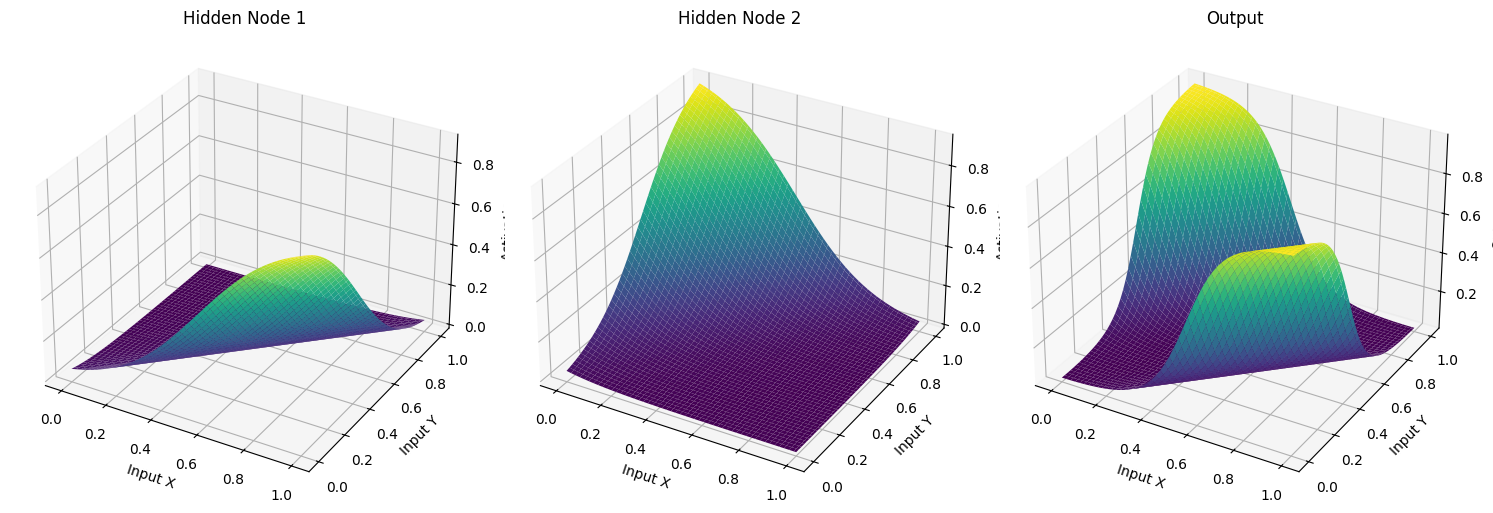

In [24]:
# lets get the output and hidden layer activations for each point
with torch.no_grad():
    output, hidden = model(xy_grid)


output = output.reshape(100, 100)
hidden1 = hidden[:, 0].reshape(100, 100)
hidden2 = hidden[:, 1].reshape(100, 100)

# plot
fig = plt.figure(figsize=(15, 5))

# output of the first hidden node
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(x_grid.numpy(), y_grid.numpy(), hidden1.numpy(), cmap='viridis')
ax1.set_title('Hidden Node 1')
ax1.set_xlabel('Input X')
ax1.set_ylabel('Input Y')
ax1.set_zlabel('Activation')

# output of the second hidden node 
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(x_grid.numpy(), y_grid.numpy(), hidden2.numpy(), cmap='viridis')
ax2.set_title('Hidden Node 2')
ax2.set_xlabel('Input X')
ax2.set_ylabel('Input Y')
ax2.set_zlabel('Activation')

# output for the whole model
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(x_grid.numpy(), y_grid.numpy(), output.numpy(), cmap='viridis')
ax3.set_title('Output')
ax3.set_xlabel('Input X')
ax3.set_ylabel('Input Y')
ax3.set_zlabel('Output')

plt.tight_layout()
plt.show()